<a href="https://colab.research.google.com/github/DamodaraBarbosa/machine_learning_studies/blob/main/Star_type_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()

# Loading the dataframe

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Kaggle/6 class csv.csv')

In [4]:
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


# About the dataset

From Kaggle: https://www.kaggle.com/datasets/deepu1109/star-dataset

This CSV file contains a dataset of 240 stars of 6 classes:

Brown Dwarf -> Star Type = 0

Red Dwarf -> Star Type = 1

White Dwarf-> Star Type = 2

Main Sequence -> Star Type = 3

Supergiant -> Star Type = 4

Hypergiant -> Star Type = 5

The Luminosity and radius of each star is calculated w.r.t. that of the values of Sun.

Lo = 3.828 x 10^26 Watts

Ro = 6.9551 x 10^8 m

## Dataset's dimensions

In [5]:
print(f'Number of columns: {df.shape[1]}')
print(f'Number of rows: {df.shape[0]}')

Number of columns: 7
Number of rows: 240


## Dataset's infos

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


There is no null value in the intire dataset.

# Column renaming

To make access to dataframe column information, columns are renamed.

In [7]:
df.columns = ['temperature', 'luminosity', 
              'radius', 'absolute_magnitude', 
              'star_type', 'star_color', 'spectral_class']

In [8]:
df.head()

,temperature,luminosity,radius,absolute_magnitude,star_type,star_color,spectral_class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


# Exploratory analysis

## Column `temperature`

The unit of temperature used in the data for this quantity is the Kelvin (K) scale.

### Average, median and mode

In [9]:
pd.DataFrame({'Average': df['temperature'].mean(),
              'Median': df['temperature'].median(),
              'Mode': df['temperature'].mode()[0]},
             index= ['Values'])

,Average,Median,Mode
Values,10497.4625,5776.0,3600


### Mean absolute deviation, variance and standard deviation

In [10]:
pd.DataFrame({'Mean absolute deviation': df['temperature'].mad(),
              'Variance': df['temperature'].var(),
              'Standard deviation': df['temperature'].std()},
             index= ['Values'])

,Mean absolute deviation,Variance,Standard deviation
Values,7707.765312,9.124882e+07,9552.425037


### Quartiles

In [11]:
pd.DataFrame(df['temperature'].describe()[['25%', '50%', '75%']])

,temperature
25%,3344.25
50%,5776.00
75%,15055.50


### Histogram

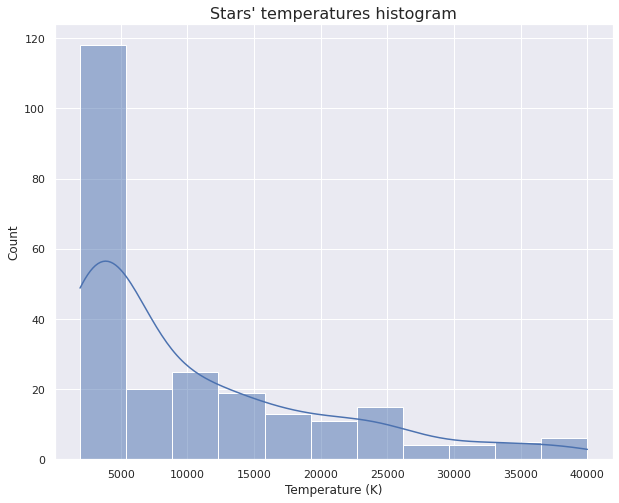

In [12]:
plt.figure(figsize= (10, 8))
ax = sns.histplot(data= df, x= 'temperature', kde= True)
ax.set_title("Stars' temperatures histogram", fontsize= 16)
plt.xlabel('Temperature (K)')
plt.show()

### Boxplot

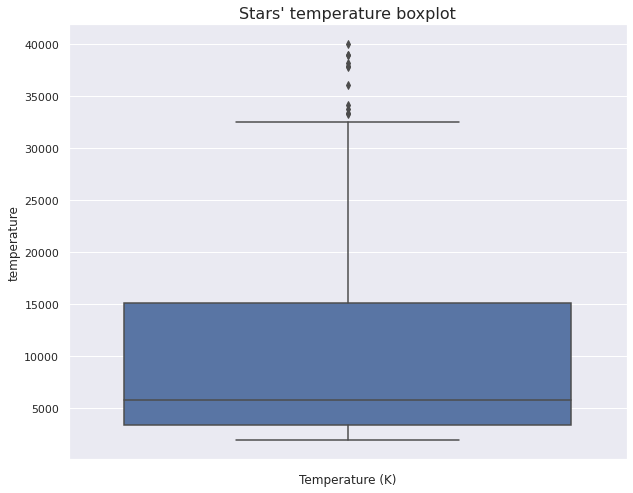

In [13]:
plt.figure(figsize= (10, 8))
ax = sns.boxplot(data= df, y= 'temperature')
ax.set_title("Stars' temperature boxplot", fontsize= 16)
plt.xlabel('Temperature (K)')
plt.show()

## Column `luminosity`

### Average, median and mode

In [14]:
pd.DataFrame({'Average': df['luminosity'].mean(),
              'Median': df['luminosity'].median(),
              'Mode': df['luminosity'].mode()[0]}, 
             index= ['Values'])

,Average,Median,Mode
Values,107188.361635,0.0705,200000.0


### Mean absolute deviation, variance and standard deviation

In [15]:
pd.DataFrame({'Mean deviation': df['luminosity'].mad(),
              'Variance': df['luminosity'].var(),
              'Standard deviation': df['luminosity'].std()},
             index= ['Values'])

,Mean deviation,Variance,Standard deviation
Values,136913.238522,3.219593e+10,179432.24494


### Quartiles

In [16]:
pd.DataFrame(df['luminosity'].describe()[['25%', '50%', '75%']])

,luminosity
25%,0.000865
50%,0.070500
75%,198050.000000


### Histogram

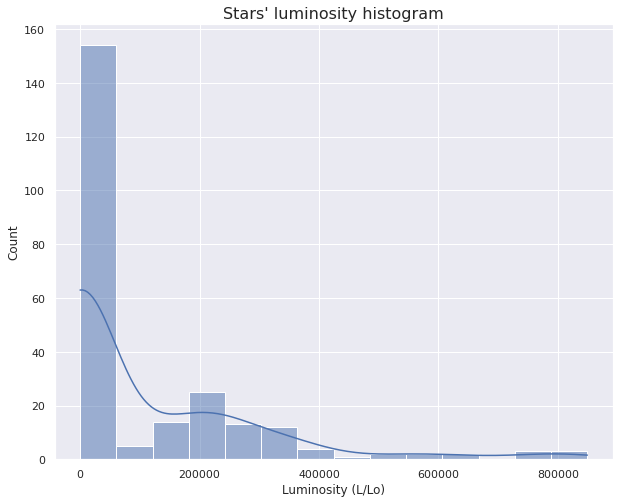

In [17]:
plt.figure(figsize= (10, 8))
ax = sns.histplot(data= df, x= 'luminosity', kde= True)
ax.set_title("Stars' luminosity histogram", fontsize= 16)
plt.xlabel('Luminosity (L/Lo)')
plt.show()

### Boxplot

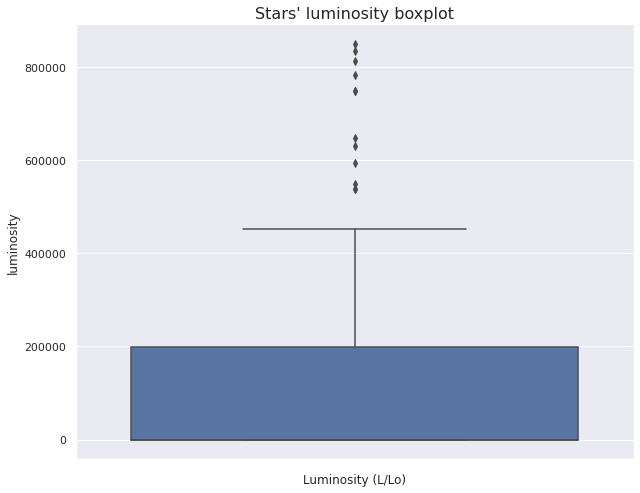

In [18]:
plt.figure(figsize= (10, 8))
ax = sns.boxplot(data=df, y= 'luminosity')
ax.set_title("Stars' luminosity boxplot", fontsize= 16)
plt.xlabel('Luminosity (L/Lo)')
plt.show()

## Column `radius`

The data present in the radius variable are determined in relation to the solar radius.

### Average, median and mode

In [19]:
pd.DataFrame({'Average': df['radius'].mean(),
              'Median': df['radius'].median(),
              'Mode': [df['radius'].mode().values]},
             index= ['Values'])

,Average,Median,Mode
Values,237.157781,0.7625,"[0.11, 0.24, 36.0, 1324.0]"


### Mean absolute deviation, variance and standard deviation

In [20]:
pd.DataFrame({'Mean deviation': df['radius'].mad(),
              'Variance': df['radius'].var(),
              'Standard deviation': df['radius'].std()},
             index= ['Values'])

,Mean deviation,Variance,Standard deviation
Values,376.579906,267450.083621,517.155763


### Quartiles

In [21]:
pd.DataFrame(df['radius'].describe()[['25%', '50%', '75%']])

,radius
25%,0.10275
50%,0.76250
75%,42.75000


### Histogram

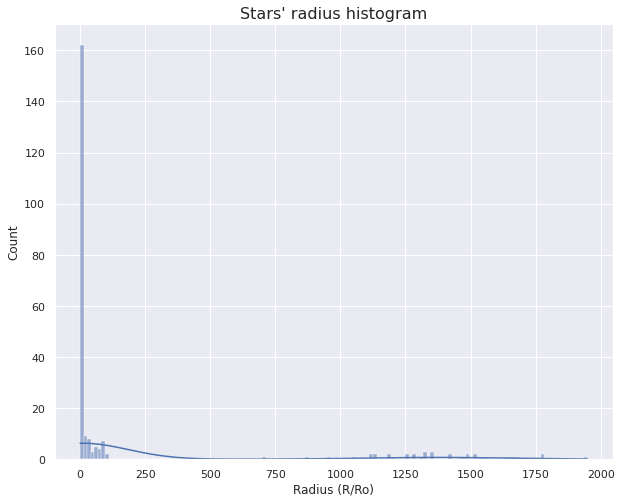

In [22]:
plt.figure(figsize= (10, 8))
ax = sns.histplot(data= df, x= 'radius', kde= True)
ax.set_title("Stars' radius histogram", fontsize= 16)
plt.xlabel('Radius (R/Ro)')
plt.show()

### Boxplot

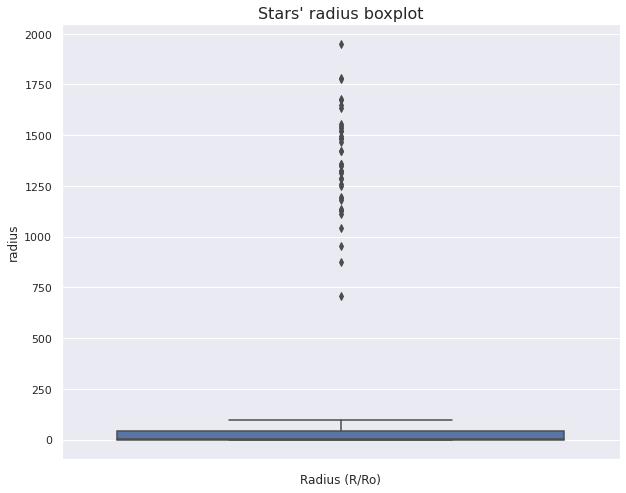

In [23]:
plt.figure(figsize= (10, 8))
ax = sns.boxplot(data= df, y= 'radius')
ax.set_title("Stars' radius boxplot", fontsize= 16)
plt.xlabel('Radius (R/Ro)')
plt.show()

## Column `absolute_magnitude`

It consists of the absolute visual magnitude (Mv) of the stars.

### Average, median and mode

In [24]:
pd.DataFrame({'Average': df['absolute_magnitude'].mean(),
              'Median': df['absolute_magnitude'].median(),
              'Mode': df['absolute_magnitude'].mode()[0]},
             index= ['Values'])

,Average,Median,Mode
Values,4.382396,8.313,12.23


### Mean absolute deviation, variance and standard deviation

In [25]:
pd.DataFrame({'Mean absolute deviation': df['absolute_magnitude'].mad(),
              'Variance': df['absolute_magnitude'].var(),
              'Standard deviation': df['absolute_magnitude'].std()},
             index= ['Values'])

,Mean absolute deviation,Variance,Standard deviation
Values,9.905969,110.933816,10.532512


### Histogram

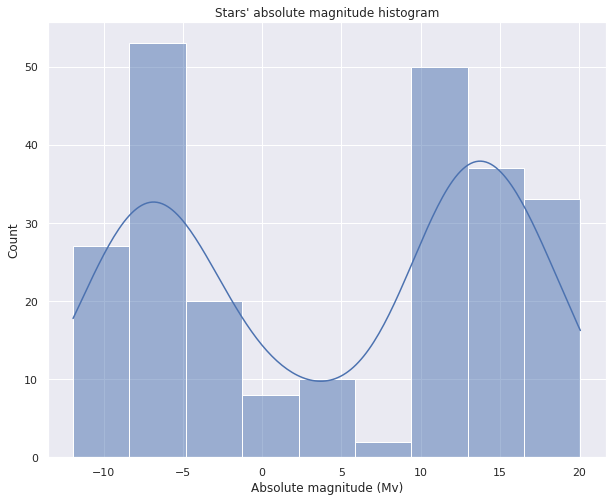

In [26]:
plt.figure(figsize= (10, 8))
ax = sns.histplot(data= df, x= 'absolute_magnitude', kde= True)
ax.set_title("Stars' absolute magnitude histogram")
plt.xlabel('Absolute magnitude (Mv)')
plt.show()

### Boxplot

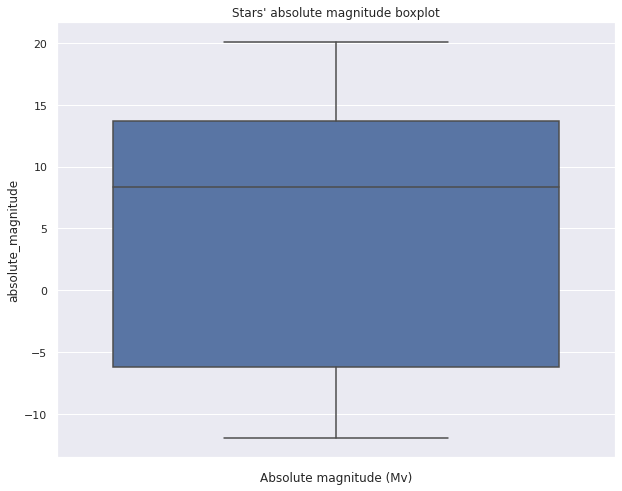

In [27]:
plt.figure(figsize= (10, 8))
ax = sns.boxplot(data= df, y= 'absolute_magnitude')
ax.set_title("Stars' absolute magnitude boxplot")
plt.xlabel('Absolute magnitude (Mv)')
plt.show()

### Column `star_color`

It contains the star's colors after spectral analysis.

In [28]:
f'There are {df["star_color"].nunique()} different types of stars in the database regarding their color.'

'There are 19 different types of stars in the database regarding their color.'

The types are:

In [29]:
df['star_color'].unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'Blue ',
       'yellowish', 'Yellowish', 'Orange-Red', 'Blue white ',
       'Blue-White'], dtype=object)

But some of the data appears to have been entered incorrectly. Therefore, it is necessary that they are reset:

In [30]:
df.replace('Blue ', 'Blue', inplace= True)

In [31]:
df.replace('white', 'White', inplace= True)

In [32]:
df.replace(['Blue White', 'Blue white', 'Blue white ', 'Blue-white'], 'Blue-White', inplace= True)

In [33]:
df.replace('yellowish', 'Yellowish', inplace= True)

And for aesthetic reasons to make all types start with capital letters:

In [34]:
df.replace('yellow-white', 'Yellow-White', inplace= True)

After processing the column data, it is observed that:

In [35]:
f'The database contains {df["star_color"].nunique()} different types of stars according to their colors.'

'The database contains 12 different types of stars according to their colors.'

In [36]:
df['star_color'].unique()

array(['Red', 'Blue-White', 'White', 'Yellowish White',
       'Pale yellow orange', 'Blue', 'Whitish', 'Yellow-White', 'Orange',
       'White-Yellow', 'Yellowish', 'Orange-Red'], dtype=object)

### Stars' color count

In [42]:
count_star_color = pd.DataFrame({'Count': df['star_color'].value_counts(ascending= True)})

In [43]:
count_star_color

,Count
Pale yellow orange,1
White-Yellow,1
Orange-Red,1
Whitish,2
Orange,2
Yellowish White,3
Yellowish,3
Yellow-White,8
White,10
Blue-White,41


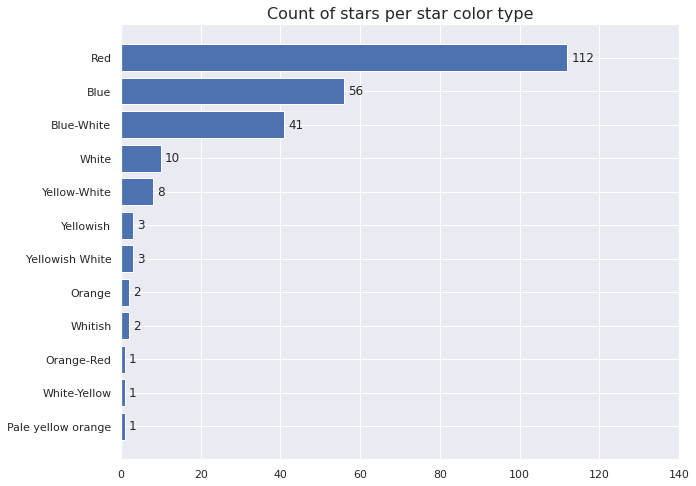

In [54]:
plt.figure(figsize= (10, 8))
bars = plt.barh(count_star_color.index, count_star_color['Count'])

for index, bar in enumerate(bars):
  plt.text(bar.get_width() + 1, index - 0.1, bar.get_width())

plt.title('Count of stars per star color type', fontsize= 16)
plt.xlim([0, 140])
plt.show()

### How does each variable behave for each type of star? 

#### Temperature

* Mean, median and standard deviation:

In [62]:
pd.DataFrame({'Mean': df.groupby('star_color')['temperature'].mean().round(2),
              'Median': df.groupby('star_color')['temperature'].median(),
              'Standard deviation': df.groupby('star_color')['temperature'].std().round(2)})

,Mean,Median,Standard deviation
star_color,,,
Blue,21918.34,19921.5,9453.98
Blue-White,16659.95,14100.0,6560.05
Orange,4018.00,4018.0,380.42
Orange-Red,5112.00,5112.0,NaN
Pale yellow orange,7230.00,7230.0,NaN
Red,3291.79,3324.0,490.78
White,9720.30,8879.5,2563.62
White-Yellow,7100.00,7100.0,NaN
Whitish,8876.00,8876.0,1165.31


* Histogram

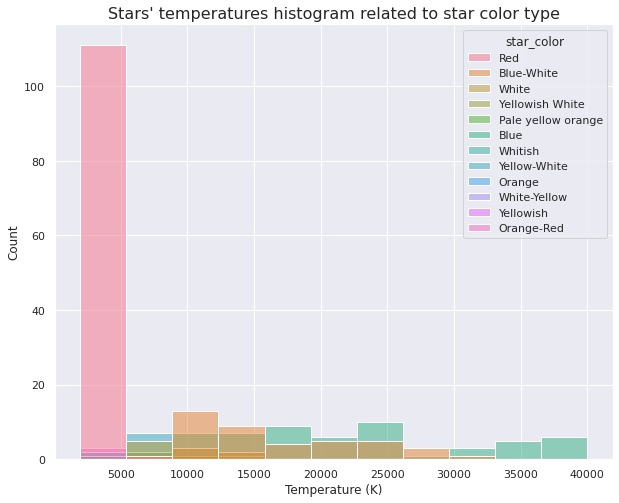

In [83]:
plt.figure(figsize= (10, 8))
ax = sns.histplot(data= df, x= 'temperature', hue= 'star_color')
ax.set_title("Stars' temperatures histogram related to star color type", fontsize= 16)
plt.xlabel('Temperature (K)')
plt.show()

* Boxplot

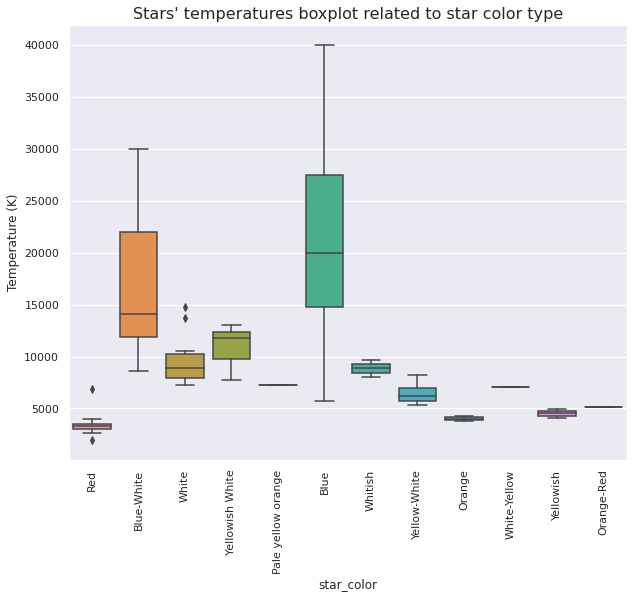

In [84]:
plt.figure(figsize= (10, 8))
ax = sns.boxplot(data= df, x= 'star_color', y= 'temperature')
ax.set_title("Stars' temperatures boxplot related to star color type", fontsize= 16)
plt.ylabel('Temperature (K)')
plt.xticks(rotation= '90')
plt.show()

The analysis of central tendencies together with the boxplot graph seems to indicate that blue stars tend to have a higher temperature.

#### Luminosity

* Mean, median and standard deviation:

In [74]:
pd.DataFrame({'Mean': df.groupby('star_color')['luminosity'].mean(),
              'Median': df.groupby('star_color')['luminosity'].median(),
              'Standard deviation': df.groupby('star_color')['luminosity'].std()})

,Mean,Median,Standard deviation
star_color,,,
Blue,249974.732446,223890.000000,217947.633816
Blue-White,68904.416521,788.000000,185475.774192
Orange,590000.000000,590000.000000,56568.542495
Orange-Red,0.630000,0.630000,NaN
Pale yellow orange,0.000080,0.000080,NaN
Red,60526.787893,0.002550,104282.874572
White,94243.300229,0.000335,201123.823736
White-Yellow,0.000290,0.000290,NaN
Whitish,41.350000,41.350000,46.174073


* Histogram:

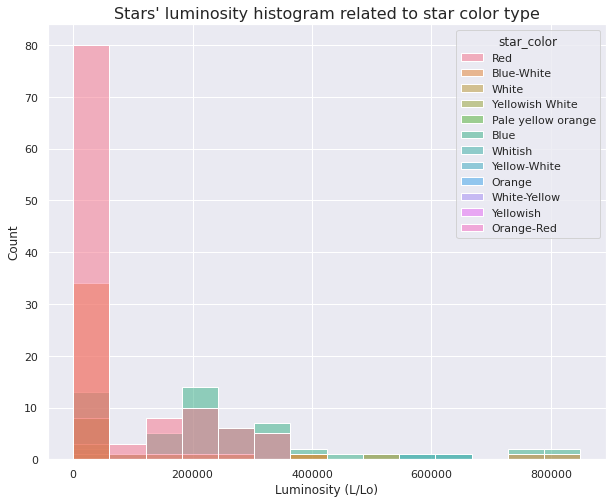

In [85]:
plt.figure(figsize= (10, 8))
ax = sns.histplot(data= df, x= 'luminosity', hue= 'star_color')
ax.set_title("Stars' luminosity histogram related to star color type", fontsize= 16)
plt.xlabel('Luminosity (L/Lo)')
plt.show()

* Boxplot

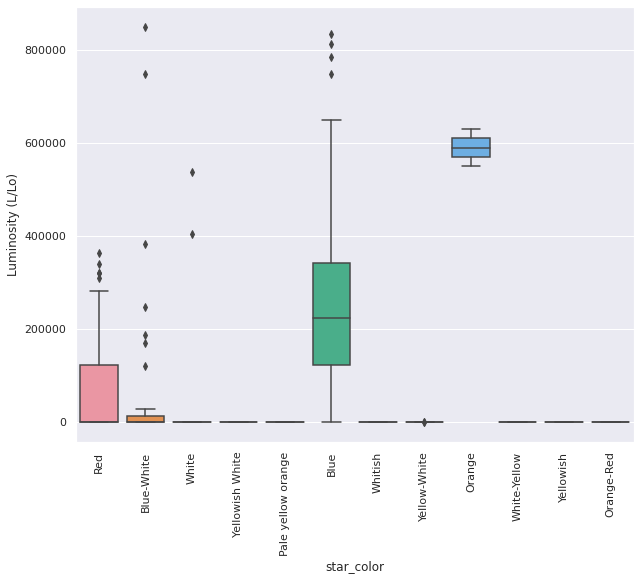

In [86]:
plt.figure(figsize= (10, 8))
ax = sns.boxplot(data= df, x= 'star_color', y= 'luminosity')
ax.set_title("Stars' luminosity boxplot related to star color type", fontsize= 16)
plt.ylabel('Luminosity (L/Lo)')
plt.xticks(rotation= '90')
plt.show()

In [82]:
df.query('star_color == "Orange"')

,temperature,luminosity,radius,absolute_magnitude,star_type,star_color,spectral_class
53,3749,550000.0,1648.0,-8.05,5,Orange,M
172,4287,630000.0,1315.0,-9.20,5,Orange,K
